In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [49]:
df=pd.read_csv("Churn_Modelling.csv")
print(df.head(10))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [50]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [51]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [52]:
df.shape

(10000, 14)

In [53]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
Geography=pd.get_dummies(x["Geography"],drop_first=True)
Gender=pd.get_dummies(x["Gender"],drop_first=True)

In [55]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
x=pd.concat([x,Geography,Gender],axis=1)

In [57]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [58]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [59]:
x=x.drop(["Geography","Gender"],axis=1)

In [60]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1


In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import binary_focal_crossentropy

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
from tensorflow.keras.layers import Dense, Dropout, Activation, PReLU

In [67]:
!python --version

Python 3.7.8


In [68]:
classifier=Sequential()

In [69]:
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer="he_uniform",activation='relu'))
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation='sigmoid'))

In [70]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 72        
                                                                 
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [72]:
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [74]:
model_history = classifier.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.33)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8686 - val_loss: 0.3641 - val_accuracy: 0.8459
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8673 - val_loss: 0.3617 - val_accuracy: 0.8459
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8666 - val_loss: 0.3603 - val_accuracy: 0.8463
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8673 - val_loss: 0.3618 - val_accuracy: 0.8478
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8679 - val_loss: 0.3623 - val_accuracy: 0.8478
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8686 - val_loss: 0.3628 - val_accuracy: 0.8459
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8677 - val_loss: 0.3600 - val_accuracy: 0.8485

In [75]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


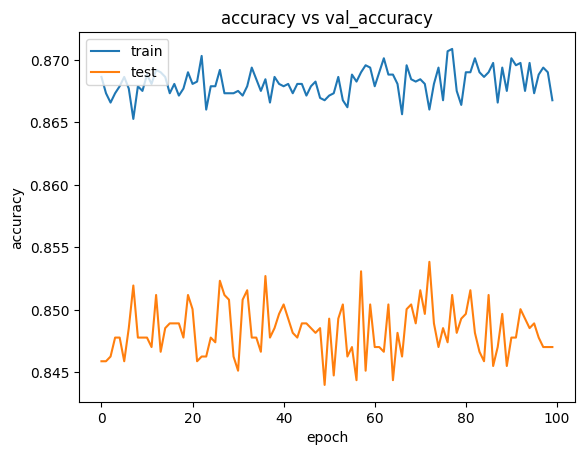

In [76]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("accuracy vs val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [77]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 848us/step


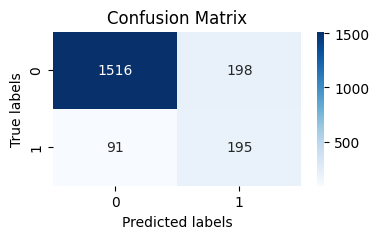

In [81]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)

In [83]:
ac

0.8555

In [84]:
import pickle

In [94]:
with open(r"C:\Users\vasanthselvarasu\Documents\deep learning\starting\banking.pkl","wb") as pickle_file:
    pickle.dump(classifier,pickle_file)
    

In [99]:
#load the saved modle 
classifier.save("my_model.h5")